# CAPSTONE 3. Predicting Next Cryptocyrrency Market Cycle Peak.
## Exploratory Data Analysis
In this notebook we will perform Exploratory Data Analysis. The goal of this notebook is to take a closer look at our data and see if we can extract any insights from it. The questions we would like to answer by the end of this notebook are:<br>
<ul><i>What is the biggest token in terms of trading volume?<br>
    What token has the highest price?<br>
    What token shows the highest ROI?<br>
    Is there any intercorrelation between tokens' prices?<br>
    What are the summary statistics for each coin and for all coins combined?<br>
    What features are correlated with each other?<br>
    What is the nature of this correlation?</i><br>
</ul>
This is not a complete list by any means. During our analysis we will come up with some other quiestions and we will answer them right away. <br>
Let's start.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting default figure size
sns.set(rc={"figure.figsize":(12, 6)})

sns.set_style('whitegrid')

#showing only 2 decimals for floats
pd.options.display.float_format = "{:.2f}".format

In [2]:
df = pd.read_csv('../DW/Data_for_EDA.csv')

In [3]:
df.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Adj Close_BTC,Volume_BTC,Open_ETH,High_ETH,Low_ETH,...,Low_XRP,Close_XRP,Adj Close_XRP,Volume_XRP,Open_LTC,High_LTC,Low_LTC,Close_LTC,Adj Close_LTC,Volume_LTC
0,2015-08-07,278.74,280.39,276.37,279.58,279.58,42484800.00,2.83,3.54,2.52,...,0.01,0.01,0.01,363643.00,4.06,4.22,3.97,4.21,4.21,4192810.00
1,2015-08-08,279.74,279.93,260.71,261.00,261.00,58533000.00,2.79,2.80,0.71,...,0.01,0.01,0.01,678295.00,4.22,4.22,3.84,3.85,3.85,4917730.00
2,2015-08-09,261.12,267.00,260.47,265.08,265.08,23789600.00,0.71,0.88,0.63,...,0.01,0.01,0.01,531969.00,3.84,3.98,3.81,3.90,3.90,3064680.00
3,2015-08-10,265.48,267.03,262.60,264.47,264.47,20979400.00,0.71,0.73,0.64,...,0.01,0.01,0.01,472973.00,3.90,3.98,3.90,3.95,3.95,2239890.00
4,2015-08-11,264.34,270.39,264.09,270.39,270.39,25433900.00,0.71,1.13,0.66,...,0.01,0.01,0.01,282461.00,3.95,4.16,3.94,4.16,4.16,3426300.00


This is the general overview of our data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1994 non-null   object 
 1   Open_BTC       1994 non-null   float64
 2   High_BTC       1994 non-null   float64
 3   Low_BTC        1994 non-null   float64
 4   Close_BTC      1994 non-null   float64
 5   Adj Close_BTC  1994 non-null   float64
 6   Volume_BTC     1994 non-null   float64
 7   Open_ETH       1994 non-null   float64
 8   High_ETH       1994 non-null   float64
 9   Low_ETH        1994 non-null   float64
 10  Close_ETH      1994 non-null   float64
 11  Adj Close_ETH  1994 non-null   float64
 12  Volume_ETH     1994 non-null   float64
 13  Open_XRP       1994 non-null   float64
 14  High_XRP       1994 non-null   float64
 15  Low_XRP        1994 non-null   float64
 16  Close_XRP      1994 non-null   float64
 17  Adj Close_XRP  1994 non-null   float64
 18  Volume_X

As we know from the Data Wrangling step, we don't have any missing values, out dates are Datetime objetcs and are numbers are floats. Now, let's see the period our data spans for and take a look at the summary statistics for each of the tokens.

In [5]:
print(df['Date'].min())
print(df['Date'].max())

2015-08-07
2021-01-24


The earliest observation we have was made on August 7, 2015. The latest one was made on January 24, 2021.

In [6]:
#creating a list of column names for each tokens
BTC_cols = [col for col in df.columns if '_BTC' in col]
ETH_cols = [col for col in df.columns if '_ETH' in col]
XRP_cols = [col for col in df.columns if '_XRP' in col]
LTC_cols = [col for col in df.columns if '_LTC' in col]
cols = [BTC_cols, ETH_cols, XRP_cols, LTC_cols]

In [7]:
#printing summary statistics for each token
for column in cols:
    print(df[column].describe())
    print('')

       Open_BTC  High_BTC  Low_BTC  Close_BTC  Adj Close_BTC      Volume_BTC
count   1994.00   1994.00  1994.00    1994.00        1994.00         1994.00
mean    5981.18   6141.66  5816.83    5999.08        5999.08  11178903330.44
std     5609.31   5811.74  5396.70    5648.39        5648.39  14513660955.93
min      210.07    226.32   199.57     210.49         210.49     12712600.00
25%      781.78    792.78   778.21     786.31         786.31    136257244.00
50%     5936.89   6188.96  5763.20    5966.26        5966.26   4822792733.50
75%     9117.35   9275.57  8866.65    9123.19        9123.19  18120269617.25
max    40788.64  41946.74 38980.88   40797.61       40797.61 123320567398.00

       Open_ETH  High_ETH  Low_ETH  Close_ETH  Adj Close_ETH     Volume_ETH
count   1994.00   1994.00  1994.00    1994.00        1994.00        1994.00
mean     231.93    240.42   222.82     232.58         232.58  4806319434.27
std      247.45    259.12   234.65     248.67         248.67  6764373973.63
mi

We can see from the statistics above that 'Volume' is quite big. To make it easier for observing we will create a new column that will show the <b>volume in millions</b>.

In [8]:
#creating list of volume columns
vol_cols = [col for col in df.columns if 'Volume_' in col]
#dividing volume by one million to get volume in billions
df[vol_cols] = df[vol_cols] / 1000000000

In [9]:
df.tail(3)

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Adj Close_BTC,Volume_BTC,Open_ETH,High_ETH,Low_ETH,...,Low_XRP,Close_XRP,Adj Close_XRP,Volume_XRP,Open_LTC,High_LTC,Low_LTC,Close_LTC,Adj Close_LTC,Volume_LTC
1991,2021-01-18,35792.24,37299.29,34883.84,36630.07,36630.07,49.51,1230.31,1259.45,1187.31,...,0.27,0.28,0.28,3.24,142.43,154.53,138.81,152.14,152.14,6.64
1992,2021-01-19,36642.23,37755.89,36069.80,36069.80,36069.80,57.24,1257.43,1432.30,1254.52,...,0.28,0.29,0.29,5.58,152.20,165.92,150.49,153.49,153.49,9.31
1993,2021-01-24,31794.33,32938.77,31106.69,31786.88,31786.88,46.81,1329.80,1362.22,1225.87,...,0.27,0.27,0.27,2.45,141.67,142.62,134.48,138.43,138.43,4.81


Great. Now it's much easier to see the trading volume of each token. However, we can also see we are missing one of the crytical components of each cryptocurrency statistics - its total market capitalization. We will have to engineer this feature in order to better understand our data.<br>
<br>
Market cap can be calculated by multipluying token's volume by its closing price (in stock market, the only difference between adjusted closing price and closing price is that the former consider to be more precise than the latter because it reflects other stock's attributes. However, in crypto it doesn't make any difference since this market does not have any corporate or government regulations, so we can easily remove adjusted closing price columns).

In [10]:
#removing adjusted closing price
adj_close = [col for col in df.columns if 'Adj Close_' in col]
df = df.drop(adj_close, axis=1)

In [11]:
#creatng market capitalization columns (billions)
MarketCap_BTC = (df['Volume_BTC'] * df['Close_BTC'])
MarketCap_ETH = (df['Volume_ETH'] * df['Close_ETH'])
MarketCap_XRP = (df['Volume_XRP'] * df['Close_XRP'])
MarketCap_LTC = (df['Volume_LTC'] * df['Close_LTC'])
mc_cols = [MarketCap_BTC, MarketCap_ETH, MarketCap_XRP, MarketCap_LTC]

Now let's insert those columns to our dataframe after each token's 'Volume' column. We need to find the indexes of each of the volume columns.

In [12]:
for column in vol_cols:
    print(column, 'index is:', df.columns.get_loc(column))

Volume_BTC index is: 5
Volume_ETH index is: 10
Volume_XRP index is: 15
Volume_LTC index is: 20


Now we can insert our MarketCap columns.

In [13]:
df.insert(6, 'MarketCap_BTC', MarketCap_BTC)
df.insert(12, 'MarketCap_ETH', MarketCap_ETH)
df.insert(18, 'MarketCap_XRP', MarketCap_XRP)
df.insert(24, 'MarketCap_LTC', MarketCap_LTC)

In [14]:
df.columns

Index(['Date', 'Open_BTC', 'High_BTC', 'Low_BTC', 'Close_BTC', 'Volume_BTC',
       'MarketCap_BTC', 'Open_ETH', 'High_ETH', 'Low_ETH', 'Close_ETH',
       'Volume_ETH', 'MarketCap_ETH', 'Open_XRP', 'High_XRP', 'Low_XRP',
       'Close_XRP', 'Volume_XRP', 'MarketCap_XRP', 'Open_LTC', 'High_LTC',
       'Low_LTC', 'Close_LTC', 'Volume_LTC', 'MarketCap_LTC'],
      dtype='object')

In [19]:
df.tail()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,MarketCap_BTC,Open_ETH,High_ETH,Low_ETH,...,Low_XRP,Close_XRP,Volume_XRP,MarketCap_XRP,Open_LTC,High_LTC,Low_LTC,Close_LTC,Volume_LTC,MarketCap_LTC
1989,2021-01-16,36821.65,37864.37,35633.55,36178.14,57.71,2087702.58,1171.44,1290.05,1157.62,...,0.28,0.28,4.12,1.15,144.19,152.06,140.00,144.27,7.18,1036.38
1990,2021-01-17,36163.65,36722.35,34069.32,35791.28,52.36,1874026.07,1233.45,1265.64,1174.39,...,0.27,0.28,3.49,0.97,144.22,146.82,137.07,142.43,6.10,868.66
1991,2021-01-18,35792.24,37299.29,34883.84,36630.07,49.51,1813617.33,1230.31,1259.45,1187.31,...,0.27,0.28,3.24,0.92,142.43,154.53,138.81,152.14,6.64,1010.27
1992,2021-01-19,36642.23,37755.89,36069.80,36069.80,57.24,2064786.95,1257.43,1432.30,1254.52,...,0.28,0.29,5.58,1.64,152.20,165.92,150.49,153.49,9.31,1429.70
1993,2021-01-24,31794.33,32938.77,31106.69,31786.88,46.81,1487870.15,1329.80,1362.22,1225.87,...,0.27,0.27,2.45,0.67,141.67,142.62,134.48,138.43,4.81,665.74


Now we have all the data needed to proceed. Let's plot our currencies market caps for January 2021.

In [15]:
data = pd.DataFrame(df.iloc[-20:])

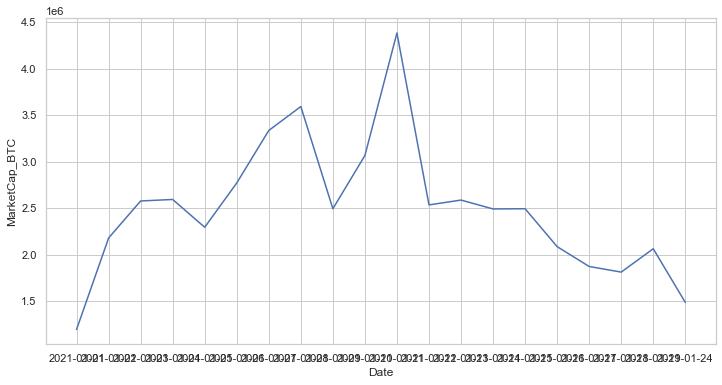

In [16]:
sns.lineplot(data=data, x='Date', y='MarketCap_BTC');